 ## t-SNE visualization of binary file data (Training Set) Proposed

In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from bioinfokit.visuz import cluster
import copy 
import pandas as pd
import os

In [2]:
Set_name = '0'
level = 'Base-16//'
path = '//Users//dinuka//Dropbox//MURI-Dinuka//UW//Binary Classification//Simulations//123_gramTF-IDF//'

#Load Training set 
train_file1 = path+level+'BinaryBlobData_12Gram-TrainSet-'+Set_name
train_file2 = path+level+'BinaryBlobData_3Gram-TrainSet-'+Set_name
#Combining (1,2)-gram and 3-gram features to make the complete Training set 
df1_train = pd.read_pickle(train_file1)
df2_train = pd.read_pickle(train_file2)
df1_train.pop("label").values
shift_value = df1_train.shape[1]
column_reindex = []
for ii in range(0,df2_train.shape[1]-1):
    column_reindex.append(str(ii+shift_value))
column_reindex.append('label')
dictOfColumn_reindex = { ii : column_reindex[ii] for ii in range(0, len(column_reindex)) }
df2_train = df2_train.rename(dictOfColumn_reindex, axis='columns')
df_train = pd.concat([df1_train, df2_train], axis = 1)
    
#Load Test set 
test_file1 = path+level+'BinaryBlobData_12Gram-TestSet-'+Set_name
test_file2 = path+level+'BinaryBlobData_3Gram-TestSet-'+Set_name
#Combining (1,2)-gram and 3-gram features to make the complete Test set 
df1_test = pd.read_pickle(test_file1)
df2_test = pd.read_pickle(test_file2)
df1_test.pop("label").values
shift_value = df1_test.shape[1]
column_reindex = []
for ii in range(0,df2_test.shape[1]-1):
    column_reindex.append(str(ii+shift_value))
column_reindex.append('label')
dictOfColumn_reindex = { ii : column_reindex[ii] for ii in range(0, len(column_reindex)) }
df2_test = df2_test.rename(dictOfColumn_reindex, axis='columns')
df_test = pd.concat([df1_test, df2_test], axis = 1)


#Train and Test labels
y_train_SOTA = df_train.pop("label").values
y_test_SOTA = df_test.pop("label").values

#Train and Test data
X_train_SOTA = df_train.values
X_test_SOTA = df_test.values

In [3]:
tsne_train_SOTA = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 1234)
tsne_results_train_SOTA = tsne_train_SOTA.fit_transform(X_train_SOTA)
#cluster.tsneplot(score=tsne_results_train, colorlist=y_train, colordot=('#e6194b','#a9a9a9','#bfef45','#ffd8b1','#911eb4','#42d4f4','#4363d8','#f58231','#f032e6','#800000','#3cb44b','#ffe119'), legendpos='upper right', legendanchor=(1.28, 0.9))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2856 samples in 0.539s...
[t-SNE] Computed neighbors for 2856 samples in 55.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2856
[t-SNE] Computed conditional probabilities for sample 2000 / 2856
[t-SNE] Computed conditional probabilities for sample 2856 / 2856
[t-SNE] Mean sigma: 0.355499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.018646
[t-SNE] KL divergence after 300 iterations: 1.204473


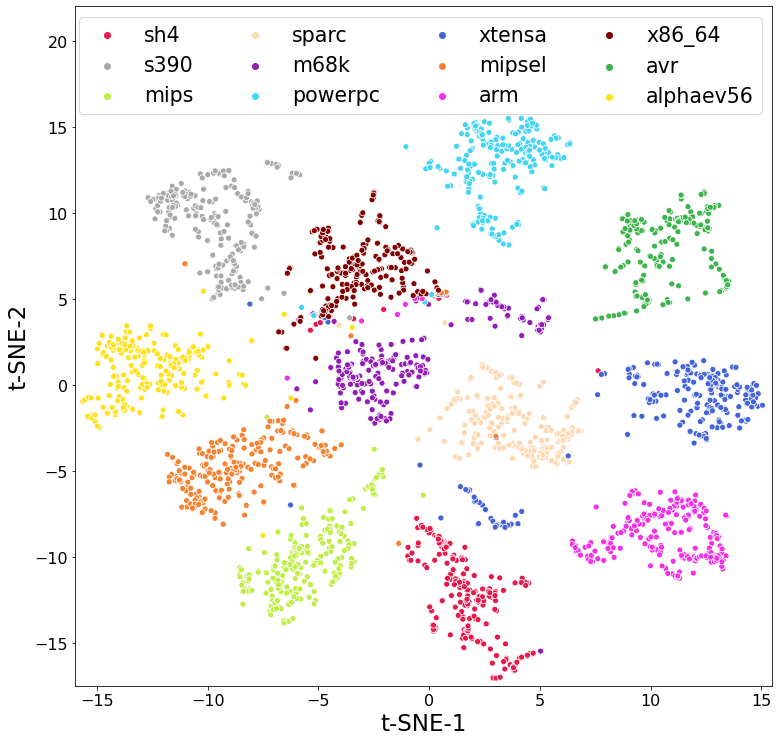

In [18]:
df_subset_SOTA = pd.DataFrame()
df_subset_SOTA['t-SNE-1'] = tsne_results_train_SOTA[:,0]
df_subset_SOTA['t-SNE-2'] = tsne_results_train_SOTA[:,1]
fig = plt.figure(figsize=(12.5,12.5))
sns.scatterplot(
    x="t-SNE-1", y="t-SNE-2",
    hue= y_train_SOTA,
    palette=['#e6194b','#a9a9a9','#bfef45','#ffd8b1','#911eb4','#42d4f4','#4363d8','#f58231','#f032e6','#800000','#3cb44b','#ffe119'],#sns.color_palette("hls", 12),
    data=df_subset_SOTA,
    legend="full"
)
# control x and y limits
plt.ylim(-17.5, 22)
plt.xlim(-16, 15.5)
plt.legend(loc='upper right', fontsize='20.5',ncol=4)
plt.xlabel('t-SNE-1',fontsize=23)
plt.ylabel('t-SNE-2',fontsize=23)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig(level[0:len(level)-2]+'_proposed.jpg')

## t-SNE visualization of binary file data (Training Set) SOTA

In [5]:
Set_name = '0'
level = 'Base-16//'
path = '//Users//dinuka//Dropbox//MURI-Dinuka//UW//Binary Classification//Simulations//1-gramTF_4Endian//'

#os.chdir(path+level)

#Load Training set 
train_file = path+level+'BinaryBlobData_SOTAfts-TrainSet-'+Set_name
df_train = pd.read_pickle(train_file)
    
#Load Test set 
test_file = path+level+'BinaryBlobData_SOTAfts-TestSet-'+Set_name
df_test = pd.read_pickle(test_file)


#Train and Test labels
y_train = df_train.pop("label").values
y_test = df_test.pop("label").values

#Train and Test data
X_train = df_train.values
X_test = df_test.values

In [6]:
tsne_train = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 1234)
tsne_results_train = tsne_train.fit_transform(X_train)
#cluster.tsneplot(score=tsne_results_train, colorlist=y_train, colordot=('#e6194b','#a9a9a9','#bfef45','#ffd8b1','#911eb4','#42d4f4','#4363d8','#f58231','#f032e6','#800000','#3cb44b','#ffe119'), legendpos='upper right', legendanchor=(1.28, 0.9))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2856 samples in 0.002s...
[t-SNE] Computed neighbors for 2856 samples in 0.204s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2856
[t-SNE] Computed conditional probabilities for sample 2000 / 2856
[t-SNE] Computed conditional probabilities for sample 2856 / 2856
[t-SNE] Mean sigma: 5.706179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.139191
[t-SNE] KL divergence after 300 iterations: 1.621181


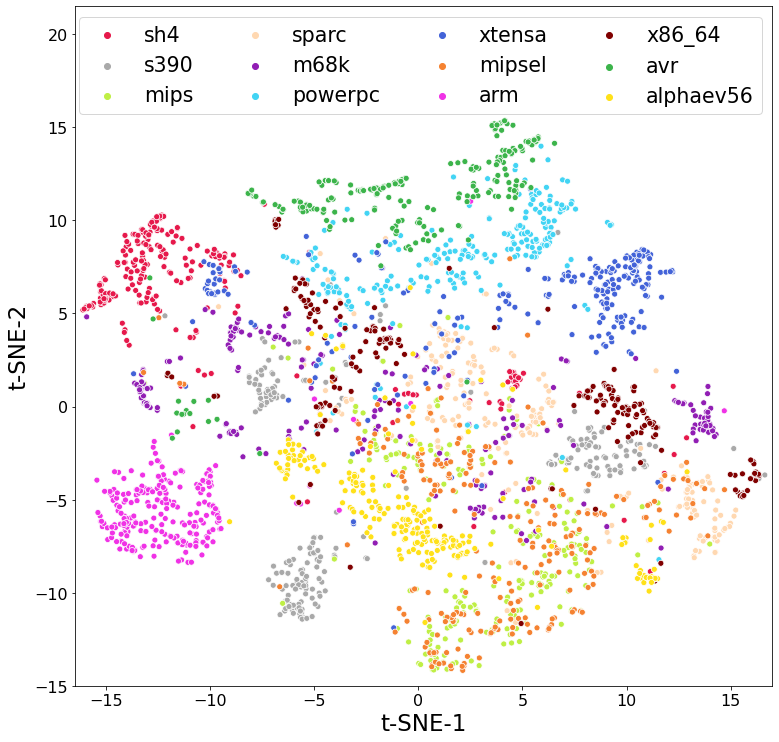

In [33]:
df_subset = pd.DataFrame()
df_subset['t-SNE-1'] = tsne_results_train[:,0]
df_subset['t-SNE-2'] = tsne_results_train[:,1]
fig = plt.figure(figsize=(12.5,12.5))
sns.scatterplot(
    x="t-SNE-1", y="t-SNE-2",
    hue= y_train,
    palette=['#e6194b','#a9a9a9','#bfef45','#ffd8b1','#911eb4','#42d4f4','#4363d8','#f58231','#f032e6','#800000','#3cb44b','#ffe119'],#sns.color_palette("hls", 12),
    data=df_subset,
    legend="full"
)
# control x and y limits
plt.ylim(-15, 21.5)
plt.xlim(-16.5, 17)
plt.legend(loc='upper right', fontsize='20.5',ncol=4)
plt.xlabel('t-SNE-1',fontsize=23)
plt.ylabel('t-SNE-2',fontsize=23)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig(level[0:len(level)-2]+'_SOTA.jpg')

In [38]:
import numpy as np
1-np.exp((-200*199)/20000)

0.8633045745544762